<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Eye_extraction_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

--2022-10-10 16:25:39--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml     [   <=>              ]   3.64M  7.09MB/s    in 0.5s    

2022-10-10 16:25:40 (7.09 MB/s) - ‘haarcascade_eye.xml’ saved [3817891]



In [ ]:
#!tar -xvf "/content/drive/MyDrive/Qualcom/crop_part1.tar.gz" -C "/content/drive/MyDrive/Qualcom"

In [ ]:
#!tar -xvf "/content/drive/MyDrive/Qualcom/UTKFace.tar.gz" -C "/content/drive/MyDrive/Qualcom"

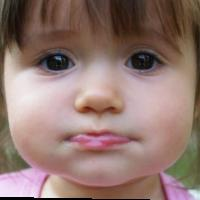

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/4_1_0_20170109190824547.jpg.chip.jpg")
cv2_imshow(image)

In [ ]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(image)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
type(eyes)

list

In [ ]:
len(eyes)

1

In [ ]:
eyes[0].shape,eyes[1].shape

IndexError: ignored

In [ ]:
eyes[0].shape

(45, 45, 3)

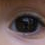

In [ ]:
cv2_imshow(eyes[0])

In [ ]:
width, height, ch = eyes[0].shape

In [ ]:
width, height, ch

(45, 45, 3)

In [ ]:
import numpy as np

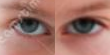

In [ ]:
import numpy as np
a = np.concatenate((eyes[1], cv2.resize(eyes[0], (55, 55))), axis = 1)
cv2_imshow(a)

## right eye

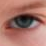

In [ ]:
cv2_imshow(eyes[0])

## lefy eye

In [ ]:
i = cv2.resize(eyes[0], (224,224),interpolation = cv2.INTER_AREA)

In [ ]:
i = cv2.resize(eyes[0], (224,224),interpolation =cv2.INTER_CUBIC)

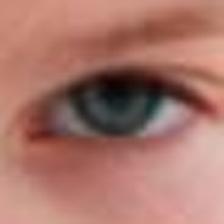

In [ ]:
cv2_imshow(i)

In [ ]:
def extract_eye(source,destination):
  image = cv2.imread(source)
  eyes = []
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eye = eye_cascade.detectMultiScale(image)
  for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  width, height, ch = eyes[1].shape
  a = np.concatenate((eyes[1], cv2.resize(eyes[0], (width, height))), axis = 1)
  # resize the image
  #i = cv2.resize(eyes[0], (224,224),interpolation =cv2.INTER_CUBIC)
  i = cv2.resize(a, (224,224),interpolation =cv2.INTER_CUBIC)
  #print(destination)
  cv2.imwrite(destination,i)

In [ ]:
import os
path = "/content/drive/MyDrive/Qualcom/crop_part1"
files = os.listdir(path)
files[101]

'5_1_0_20170109191942666.jpg.chip.jpg'

In [ ]:
source = os.path.join(path,files[100])
filename = files[101].split(".")[0] + "_resized.jpg"
destination = filename
extract_eye(source,destination)

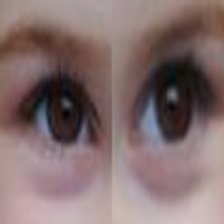

In [ ]:
img = cv2.imread("/content/5_1_0_20170109191942666_resized.jpg")
cv2_imshow(img)

## Resize Image – cv2.resize()

In [ ]:
img.shape

(224, 224, 3)

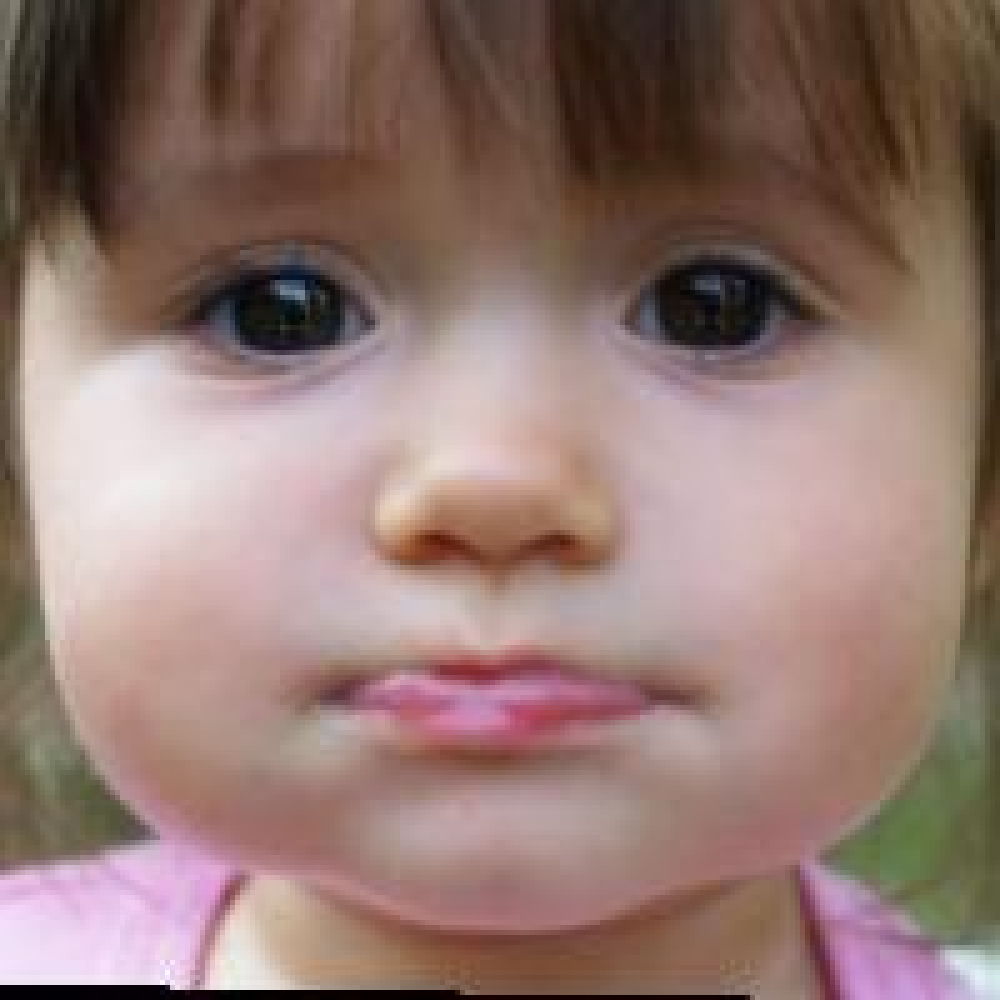

In [ ]:
import cv2
 
src = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/4_1_0_20170109190824547.jpg.chip.jpg", cv2.IMREAD_UNCHANGED)
#src = eyes[0]
#percent by which the image is resized
scale_percent = 500 # percent of original size

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(src, dsize,interpolation = cv2.INTER_AREA)
cv2_imshow(output)

In [ ]:
cv2.imwrite('/cv2-resize-image-50.png',output) 

True

In [ ]:
dsize

(184, 184)

In [ ]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(output)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
eyes[0].shape,eyes[1].shape

((24, 0, 3), (99, 99, 3))

In [ ]:
cv2_imshow(eyes[0])

error: ignored

## Count the number of images

In [ ]:
import os
image_path_1 = "/content/drive/MyDrive/Qualcom/crop_part1"
len(os.listdir(image_path_1))

9780

In [ ]:
len(os.listdir("/content/drive/MyDrive/Qualcom/UTKFace"))

23708

In [ ]:
files = os.listdir(image_path_1)

In [ ]:
files[0]

'3_1_0_20170109191958848.jpg.chip.jpg'

In [ ]:
files = os.listdir(image_path_2)

In [ ]:
files[0]

'56_0_2_20170119180737540.jpg.chip.jpg'

## Labels
* The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [ ]:
from tqdm import tqdm
age = []
gender = []
race = []
image_path = []
eye_image_path = []
invalid_files = []
destination = "/content/drive/MyDrive/Qualcom/New_Eye_Images"
image_path_2 ="/content/drive/MyDrive/Qualcom/UTKFace"
image_path_1 = "/content/drive/MyDrive/Qualcom/crop_part1"
for file in tqdm(os.listdir(image_path_2)):
  image_p = os.path.join("UTKFace",file)
  name = file.split(".")[0] + "_resized.jpg"
  eye_path = os.path.join("New_Eye_Images",name)
  source = os.path.join("/content/drive/MyDrive/Qualcom/UTKFace",file)
  destination = os.path.join("/content/drive/MyDrive/Qualcom/New_Eye_Images",name)
 
  try:
    extract_eye(source,destination)
    image_path.append(image_p)
    eye_image_path.append(eye_path)
    name = file.split("_")
    age.append(name[0])
    gender.append(name[1])
    race.append(name[2])
  except:
    invalid_files.append(source)
    continue


100%|██████████| 23708/23708 [31:30<00:00, 12.54it/s]


In [ ]:
len(age)

22656

In [ ]:
len(invalid_files)

1052

In [ ]:
import pandas as pd
df = pd.DataFrame({'image_path':image_path,'Eye_image_path':eye_image_path,'age':age,'gender':gender,'race':race})

In [ ]:
df.shape

(9382, 5)

In [ ]:
df1 = pd.DataFrame({'image_path':image_path,'Eye_image_path':eye_image_path,'age':age,'gender':gender,'race':race})

In [ ]:
df.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
1,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
2,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0
3,crop_part1/3_1_0_20170109192027975.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192027975_resized...,3,1,0
4,crop_part1/3_1_0_20170109192130439.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192130439_resized...,3,1,0


In [ ]:
df.to_csv("crop_part1_new_images.csv",index=False)

In [ ]:
df1.head()

,image_path,Eye_image_path,age,gender,race
0,UTKFace/56_0_2_20170119180737540.jpg.chip.jpg,New_Eye_Images/56_0_2_20170119180737540_resize...,56,0,2
1,UTKFace/56_0_3_20170119183551541.jpg.chip.jpg,New_Eye_Images/56_0_3_20170119183551541_resize...,56,0,3
2,UTKFace/56_0_3_20170119152358239.jpg.chip.jpg,New_Eye_Images/56_0_3_20170119152358239_resize...,56,0,3
3,UTKFace/56_0_3_20170119180848388.jpg.chip.jpg,New_Eye_Images/56_0_3_20170119180848388_resize...,56,0,3
4,UTKFace/56_0_3_20170119180731484.jpg.chip.jpg,New_Eye_Images/56_0_3_20170119180731484_resize...,56,0,3


In [ ]:
df1.to_csv("UTKface_new_images.csv",index=False)

In [ ]:
final_df = pd.concat([df,df1])

In [ ]:
final_df.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
1,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
2,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0
3,crop_part1/3_1_0_20170109192027975.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192027975_resized...,3,1,0
4,crop_part1/3_1_0_20170109192130439.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192130439_resized...,3,1,0


In [ ]:
final_df.shape

(32038, 5)

In [ ]:
final_df.to_csv("final_images_new_images.csv",index=False)

In [ ]:
sample  = os.listdir("/content/drive/MyDrive/Qualcom/New_Eye_Images")

In [ ]:
sample[10000]

'58_0_0_20170120224650587_resized.jpg'

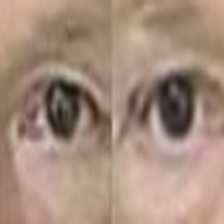

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os
img_pth = os.path.join("/content/drive/MyDrive/Qualcom/New_Eye_Images",sample[10000])
img = cv2.imread(img_pth)
cv2_imshow(img)